## ตัวจำแนกประเภทอาหาร 1

ในบทเรียนนี้ เราจะสำรวจตัวจำแนกประเภทหลากหลายชนิดเพื่อ *ทำนายประเภทอาหารประจำชาติจากกลุ่มของส่วนผสมที่ให้มา* ในขณะเดียวกัน เราจะเรียนรู้เพิ่มเติมเกี่ยวกับวิธีที่อัลกอริทึมสามารถนำมาใช้ในงานการจำแนกประเภทได้

### [**แบบทดสอบก่อนเรียน**](https://gray-sand-07a10f403.1.azurestaticapps.net/quiz/21/)

### **การเตรียมตัว**

บทเรียนนี้ต่อยอดจาก [บทเรียนก่อนหน้า](https://github.com/microsoft/ML-For-Beginners/blob/main/4-Classification/1-Introduction/solution/lesson_10-R.ipynb) ซึ่งเราได้:

-   แนะนำเบื้องต้นเกี่ยวกับการจำแนกประเภทโดยใช้ชุดข้อมูลเกี่ยวกับอาหารที่ยอดเยี่ยมของเอเชียและอินเดีย 😋

-   สำรวจ [dplyr verbs](https://dplyr.tidyverse.org/) เพื่อเตรียมและทำความสะอาดข้อมูลของเรา

-   สร้างภาพที่สวยงามโดยใช้ ggplot2

-   แสดงวิธีจัดการกับข้อมูลที่ไม่สมดุลโดยการเตรียมข้อมูลด้วย [recipes](https://recipes.tidymodels.org/articles/Simple_Example.html)

-   แสดงวิธี `prep` และ `bake` สูตรของเราเพื่อยืนยันว่ามันทำงานตามที่คาดไว้

#### **ข้อกำหนดเบื้องต้น**

สำหรับบทเรียนนี้ เราจะต้องใช้แพ็กเกจต่อไปนี้เพื่อทำความสะอาด เตรียม และสร้างภาพข้อมูลของเรา:

-   `tidyverse`: [tidyverse](https://www.tidyverse.org/) คือ [ชุดของแพ็กเกจ R](https://www.tidyverse.org/packages) ที่ออกแบบมาเพื่อทำให้การวิเคราะห์ข้อมูลเร็วขึ้น ง่ายขึ้น และสนุกขึ้น!

-   `tidymodels`: [tidymodels](https://www.tidymodels.org/) เป็นกรอบงานที่เป็น [ชุดของแพ็กเกจ](https://www.tidymodels.org/packages/) สำหรับการสร้างแบบจำลองและการเรียนรู้ของเครื่อง

-   `themis`: [แพ็กเกจ themis](https://themis.tidymodels.org/) ให้ขั้นตอนเพิ่มเติมในสูตรสำหรับจัดการกับข้อมูลที่ไม่สมดุล

-   `nnet`: [แพ็กเกจ nnet](https://cran.r-project.org/web/packages/nnet/nnet.pdf) ให้ฟังก์ชันสำหรับการประมาณเครือข่ายประสาทเทียมแบบ feed-forward ที่มีชั้นซ่อนเพียงชั้นเดียว และสำหรับแบบจำลองการถดถอยโลจิสติกแบบหลายตัวแปร

คุณสามารถติดตั้งแพ็กเกจเหล่านี้ได้ดังนี้:


`install.packages(c("tidyverse", "tidymodels", "DataExplorer", "here"))`

หรือคุณสามารถใช้สคริปต์ด้านล่างเพื่อตรวจสอบว่าคุณมีแพ็กเกจที่จำเป็นสำหรับการทำโมดูลนี้หรือไม่ และติดตั้งให้คุณในกรณีที่ยังไม่มี


In [2]:
suppressWarnings(if (!require("pacman"))install.packages("pacman"))

pacman::p_load(tidyverse, tidymodels, themis, here)

Loading required package: pacman



## 1. แบ่งข้อมูลออกเป็นชุดฝึกอบรมและชุดทดสอบ

เราจะเริ่มต้นด้วยการเลือกขั้นตอนบางส่วนจากบทเรียนก่อนหน้านี้

### ลบส่วนผสมที่พบได้บ่อยที่สุดซึ่งสร้างความสับสนระหว่างอาหารที่แตกต่างกัน โดยใช้ `dplyr::select()`

ใครๆ ก็ชอบข้าว กระเทียม และขิง!


In [3]:
# Load the original cuisines data
df <- read_csv(file = "https://raw.githubusercontent.com/microsoft/ML-For-Beginners/main/4-Classification/data/cuisines.csv")

# Drop id column, rice, garlic and ginger from our original data set
df_select <- df %>% 
  select(-c(1, rice, garlic, ginger)) %>%
  # Encode cuisine column as categorical
  mutate(cuisine = factor(cuisine))

# Display new data set
df_select %>% 
  slice_head(n = 5)

# Display distribution of cuisines
df_select %>% 
  count(cuisine) %>% 
  arrange(desc(n))

New names:
* `` -> ...1

Rows: 2448 Columns: 385

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): cuisine
dbl (384): ...1, almond, angelica, anise, anise_seed, apple, apple_brandy, a...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,⋯,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
indian,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
indian,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
indian,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
indian,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
indian,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,1,0


cuisine,n
<fct>,<int>
korean,799
indian,598
chinese,442
japanese,320
thai,289


ยอดเยี่ยม! ตอนนี้ถึงเวลาที่จะแบ่งข้อมูล โดยให้ 70% ของข้อมูลไปที่ชุดการฝึกอบรม และ 30% ไปที่ชุดการทดสอบ เราจะใช้เทคนิค `stratification` ในการแบ่งข้อมูลเพื่อ `รักษาสัดส่วนของแต่ละประเภทอาหาร` ในชุดข้อมูลการฝึกอบรมและการตรวจสอบ

[rsample](https://rsample.tidymodels.org/), แพ็กเกจใน Tidymodels, ให้โครงสร้างสำหรับการแบ่งข้อมูลและการสุ่มตัวอย่างที่มีประสิทธิภาพ:


In [4]:
# Load the core Tidymodels packages into R session
library(tidymodels)

# Create split specification
set.seed(2056)
cuisines_split <- initial_split(data = df_select,
                                strata = cuisine,
                                prop = 0.7)

# Extract the data in each split
cuisines_train <- training(cuisines_split)
cuisines_test <- testing(cuisines_split)

# Print the number of cases in each split
cat("Training cases: ", nrow(cuisines_train), "\n",
    "Test cases: ", nrow(cuisines_test), sep = "")

# Display the first few rows of the training set
cuisines_train %>% 
  slice_head(n = 5)


# Display distribution of cuisines in the training set
cuisines_train %>% 
  count(cuisine) %>% 
  arrange(desc(n))

Training cases: 1712
Test cases: 736

cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,⋯,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chinese,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
chinese,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
chinese,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chinese,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chinese,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


cuisine,n
<fct>,<int>
korean,559
indian,418
chinese,309
japanese,224
thai,202


## 2. จัดการกับข้อมูลที่ไม่สมดุล

คุณอาจสังเกตเห็นในชุดข้อมูลต้นฉบับรวมถึงชุดข้อมูลการฝึกของเรา ว่ามีการกระจายจำนวนของประเภทอาหารที่ไม่เท่ากันอย่างมาก อาหารเกาหลีมีจำนวน *เกือบ* 3 เท่าของอาหารไทย ข้อมูลที่ไม่สมดุลมักส่งผลเสียต่อประสิทธิภาพของโมเดล หลายโมเดลทำงานได้ดีที่สุดเมื่อจำนวนตัวอย่างมีความเท่ากัน และดังนั้นจึงมักมีปัญหาเมื่อข้อมูลไม่สมดุล

มีวิธีหลัก ๆ สองวิธีในการจัดการกับชุดข้อมูลที่ไม่สมดุล:

-   เพิ่มตัวอย่างในกลุ่มที่มีจำนวนน้อย: `Over-sampling` เช่น การใช้ SMOTE algorithm ซึ่งสร้างตัวอย่างใหม่ในกลุ่มที่มีจำนวนน้อยโดยใช้เพื่อนบ้านที่ใกล้เคียงของกรณีเหล่านั้น

-   ลบตัวอย่างในกลุ่มที่มีจำนวนมาก: `Under-sampling`

ในบทเรียนก่อนหน้านี้ เราได้แสดงวิธีจัดการกับชุดข้อมูลที่ไม่สมดุลโดยใช้ `recipe` ซึ่งสามารถคิดได้ว่าเป็นแผนงานที่อธิบายขั้นตอนที่ควรนำไปใช้กับชุดข้อมูลเพื่อเตรียมให้พร้อมสำหรับการวิเคราะห์ข้อมูล ในกรณีของเรา เราต้องการให้มีการกระจายจำนวนประเภทอาหารที่เท่ากันใน `training set` ของเรา มาเริ่มกันเลย!


In [5]:
# Load themis package for dealing with imbalanced data
library(themis)

# Create a recipe for preprocessing training data
cuisines_recipe <- recipe(cuisine ~ ., data = cuisines_train) %>% 
  step_smote(cuisine)

# Print recipe
cuisines_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor        380

Operations:

SMOTE based on cuisine

คุณสามารถยืนยันได้เลย (โดยใช้ prep+bake) ว่าสูตรนี้จะทำงานตามที่คุณคาดหวัง - โดยที่ป้ายกำกับอาหารทั้งหมดมี `559` การสังเกตการณ์

เนื่องจากเราจะใช้สูตรนี้เป็นตัวเตรียมข้อมูลสำหรับการสร้างแบบจำลอง `workflow()` จะทำหน้าที่เตรียมและประมวลผลข้อมูลทั้งหมดให้เรา ดังนั้นเราจะไม่ต้องคำนวณสูตรด้วยตัวเอง

ตอนนี้เราพร้อมที่จะฝึกโมเดลแล้ว 👩‍💻👨‍💻!

## 3. การเลือกตัวจำแนกประเภทของคุณ

<p >
   <img src="../../images/parsnip.jpg"
   width="600"/>
   <figcaption>ภาพประกอบโดย @allison_horst</figcaption>


ตอนนี้เราต้องตัดสินใจว่าจะใช้อัลกอริทึมใดสำหรับงานนี้ 🤔

ใน Tidymodels, [`parsnip package`](https://parsnip.tidymodels.org/index.html) มีอินเทอร์เฟซที่สม่ำเสมอสำหรับการทำงานกับโมเดลในหลายๆ engine (แพ็กเกจ) โปรดดูเอกสารของ parsnip เพื่อสำรวจ [ประเภทโมเดลและ engine](https://www.tidymodels.org/find/parsnip/#models) และ [อาร์กิวเมนต์ของโมเดล](https://www.tidymodels.org/find/parsnip/#model-args) ที่เกี่ยวข้อง ความหลากหลายอาจทำให้สับสนในตอนแรก ตัวอย่างเช่น วิธีการต่อไปนี้ล้วนเป็นเทคนิคการจัดประเภท:

-   โมเดลการจัดประเภทแบบใช้กฎ C5.0

-   โมเดลการจำแนกแบบยืดหยุ่น

-   โมเดลการจำแนกเชิงเส้น

-   โมเดลการจำแนกแบบมีการปรับค่า

-   โมเดลการถดถอยโลจิสติก

-   โมเดลการถดถอยแบบหลายตัวแปร

-   โมเดล Naive Bayes

-   Support Vector Machines

-   Nearest Neighbors

-   Decision Trees

-   Ensemble methods

-   Neural Networks

รายการยังคงมีต่อไป!

### **จะเลือกตัวจัดประเภทตัวไหนดี?**

แล้วเราควรเลือกตัวจัดประเภทตัวไหน? บ่อยครั้ง การลองใช้หลายๆ ตัวและมองหาผลลัพธ์ที่ดีเป็นวิธีการทดสอบ

> AutoML แก้ปัญหานี้ได้อย่างลงตัวโดยการเปรียบเทียบในระบบคลาวด์ ทำให้คุณสามารถเลือกอัลกอริทึมที่ดีที่สุดสำหรับข้อมูลของคุณ ลองใช้ [ที่นี่](https://docs.microsoft.com/learn/modules/automate-model-selection-with-azure-automl/?WT.mc_id=academic-77952-leestott)

นอกจากนี้ การเลือกตัวจัดประเภทขึ้นอยู่กับปัญหาของเรา ตัวอย่างเช่น เมื่อผลลัพธ์สามารถจัดหมวดหมู่ได้เป็น `มากกว่าสองคลาส` เช่นในกรณีของเรา คุณต้องใช้ `อัลกอริทึมการจัดประเภทแบบหลายคลาส` แทนที่จะเป็น `การจัดประเภทแบบไบนารี`

### **วิธีที่ดีกว่า**

วิธีที่ดีกว่าการเดาแบบสุ่มคือการทำตามแนวคิดใน [ML Cheat sheet](https://docs.microsoft.com/azure/machine-learning/algorithm-cheat-sheet?WT.mc_id=academic-77952-leestott) ที่สามารถดาวน์โหลดได้ ที่นี่เราพบว่า สำหรับปัญหาแบบหลายคลาสของเรา เรามีตัวเลือกบางอย่าง:

<p >
   <img src="../../images/cheatsheet.png"
   width="500"/>
   <figcaption>ส่วนหนึ่งของ Algorithm Cheat Sheet ของ Microsoft ที่แสดงตัวเลือกการจัดประเภทแบบหลายคลาส</figcaption>


### **เหตุผล**

ลองมาดูว่ามีวิธีการใดบ้างที่เราสามารถใช้ได้ตามข้อจำกัดที่กำหนดไว้:

-   **โครงข่ายประสาทเทียมเชิงลึกหนักเกินไป** เนื่องจากเรามีชุดข้อมูลที่สะอาดแต่มีขนาดเล็ก และเรากำลังฝึกโมเดลในเครื่องผ่านโน้ตบุ๊ก โครงข่ายประสาทเทียมเชิงลึกจึงไม่เหมาะสมสำหรับงานนี้

-   **ไม่ใช้ตัวจำแนกแบบสองคลาส** เราไม่ได้ใช้ตัวจำแนกแบบสองคลาส ดังนั้นจึงตัดวิธี one-vs-all ออกไป

-   **ต้นไม้ตัดสินใจหรือการถดถอยโลจิสติกอาจใช้ได้** ต้นไม้ตัดสินใจอาจเหมาะสม หรือการถดถอยพหุคลาส/การถดถอยโลจิสติกแบบพหุคลาสสำหรับข้อมูลหลายคลาส

-   **ต้นไม้ตัดสินใจแบบบูสต์สำหรับพหุคลาสแก้ปัญหาคนละแบบ** ต้นไม้ตัดสินใจแบบบูสต์สำหรับพหุคลาสเหมาะสำหรับงานที่ไม่ใช่พารามิเตอร์ เช่น งานที่ออกแบบมาเพื่อสร้างการจัดอันดับ ดังนั้นจึงไม่เหมาะกับเรา

โดยปกติแล้ว ก่อนที่จะเริ่มใช้โมเดลการเรียนรู้ของเครื่องที่ซับซ้อนขึ้น เช่น วิธีการแบบเอนเซมเบิล ควรเริ่มจากโมเดลที่ง่ายที่สุดเพื่อทำความเข้าใจภาพรวมของข้อมูล ดังนั้นในบทเรียนนี้ เราจะเริ่มต้นด้วยโมเดล `การถดถอยพหุคลาส` 

> การถดถอยโลจิสติกเป็นเทคนิคที่ใช้เมื่อผลลัพธ์เป็นตัวแปรเชิงหมวดหมู่ (หรือเชิงนาม) สำหรับการถดถอยโลจิสติกแบบไบนารี จำนวนตัวแปรผลลัพธ์จะมีสองค่า ในขณะที่การถดถอยโลจิสติกแบบพหุคลาสจะมีจำนวนตัวแปรผลลัพธ์มากกว่าสองค่า ดูเพิ่มเติมได้ที่ [Advanced Regression Methods](https://bookdown.org/chua/ber642_advanced_regression/multinomial-logistic-regression.html)

## 4. ฝึกและประเมินโมเดลการถดถอยโลจิสติกแบบพหุคลาส

ใน Tidymodels, `parsnip::multinom_reg()` ใช้กำหนดโมเดลที่ใช้ตัวทำนายเชิงเส้นเพื่อทำนายข้อมูลหลายคลาสโดยใช้การแจกแจงแบบพหุคลาส ดู `?multinom_reg()` เพื่อดูวิธี/เอนจินต่าง ๆ ที่คุณสามารถใช้ในการปรับโมเดลนี้

สำหรับตัวอย่างนี้ เราจะปรับโมเดลการถดถอยพหุคลาสผ่านเอนจินเริ่มต้น [nnet](https://cran.r-project.org/web/packages/nnet/nnet.pdf)

> ฉันเลือกค่า `penalty` แบบสุ่ม มีวิธีที่ดีกว่าในการเลือกค่านี้ เช่น การใช้ `resampling` และ `tuning` โมเดล ซึ่งเราจะพูดถึงในภายหลัง
>
> ดูเพิ่มเติมที่ [Tidymodels: Get Started](https://www.tidymodels.org/start/tuning/) หากคุณต้องการเรียนรู้เพิ่มเติมเกี่ยวกับการปรับแต่งพารามิเตอร์ของโมเดล


In [6]:
# Create a multinomial regression model specification
mr_spec <- multinom_reg(penalty = 1) %>% 
  set_engine("nnet", MaxNWts = 2086) %>% 
  set_mode("classification")

# Print model specification
mr_spec

Multinomial Regression Model Specification (classification)

Main Arguments:
  penalty = 1

Engine-Specific Arguments:
  MaxNWts = 2086

Computational engine: nnet 


เยี่ยมมาก 🥳! ตอนนี้เรามีสูตรและสเปคของโมเดลแล้ว เราต้องหาวิธีรวมสิ่งเหล่านี้เข้าด้วยกันเป็นวัตถุที่จะช่วยในการเตรียมข้อมูลเบื้องต้น จากนั้นจึงปรับโมเดลกับข้อมูลที่ผ่านการเตรียมแล้ว และยังสามารถรองรับกิจกรรมหลังการประมวลผลได้อีกด้วย ใน Tidymodels วัตถุที่สะดวกนี้เรียกว่า [`workflow`](https://workflows.tidymodels.org/) ซึ่งจะเก็บส่วนประกอบของการสร้างโมเดลของคุณไว้อย่างสะดวก! สิ่งนี้คือสิ่งที่เราเรียกว่า *pipelines* ใน *Python* 

ดังนั้น มาเริ่มรวมทุกอย่างเข้าด้วยกันใน workflow กันเถอะ!📦


In [7]:
# Bundle recipe and model specification
mr_wf <- workflow() %>% 
  add_recipe(cuisines_recipe) %>% 
  add_model(mr_spec)

# Print out workflow
mr_wf

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: multinom_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_smote()

── Model ───────────────────────────────────────────────────────────────────────
Multinomial Regression Model Specification (classification)

Main Arguments:
  penalty = 1

Engine-Specific Arguments:
  MaxNWts = 2086

Computational engine: nnet 


เวิร์กโฟลว์ 👌👌! **`workflow()`** สามารถปรับให้เหมาะสมได้ในลักษณะเดียวกับที่โมเดลสามารถทำได้ ดังนั้น ถึงเวลาฝึกโมเดลแล้ว!


In [8]:
# Train a multinomial regression model
mr_fit <- fit(object = mr_wf, data = cuisines_train)

mr_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: multinom_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_smote()

── Model ───────────────────────────────────────────────────────────────────────
Call:
nnet::multinom(formula = ..y ~ ., data = data, decay = ~1, MaxNWts = ~2086, 
    trace = FALSE)

Coefficients:
         (Intercept)     almond angelica         anise anise_seed       apple
indian    0.19723325  0.2409661        0 -5.004955e-05 -0.1657635 -0.05769734
japanese  0.13961959 -0.6262400        0 -1.169155e-04 -0.4893596 -0.08585717
korean    0.22377347 -0.1833485        0 -5.560395e-05 -0.2489401 -0.15657804
thai     -0.04336577 -0.6106258        0  4.903828e-04 -0.5782866  0.63451105
         apple_brandy     apricot armagnac   artemisia artichoke   asparagus
indian              0  0.37042636        0 -0.09122797         0 -0.27181970
japanese            0

ผลลัพธ์จะแสดงค่าสัมประสิทธิ์ที่โมเดลได้เรียนรู้ระหว่างการฝึก

### ประเมินผลโมเดลที่ผ่านการฝึก

ถึงเวลาที่จะดูว่าโมเดลทำงานได้ดีแค่ไหน 📏 โดยการประเมินผลบนชุดทดสอบ! มาเริ่มต้นด้วยการสร้างการคาดการณ์บนชุดทดสอบกันเถอะ!


In [9]:
# Make predictions on the test set
results <- cuisines_test %>% select(cuisine) %>% 
  bind_cols(mr_fit %>% predict(new_data = cuisines_test))

# Print out results
results %>% 
  slice_head(n = 5)

cuisine,.pred_class
<fct>,<fct>
indian,thai
indian,indian
indian,indian
indian,indian
indian,indian


งานยอดเยี่ยม! ใน Tidymodels การประเมินประสิทธิภาพของโมเดลสามารถทำได้โดยใช้ [yardstick](https://yardstick.tidymodels.org/) - แพ็กเกจที่ใช้วัดประสิทธิภาพของโมเดลด้วยตัวชี้วัดประสิทธิภาพ เช่นเดียวกับที่เราได้ทำในบทเรียนการถดถอยโลจิสติก มาเริ่มต้นด้วยการคำนวณเมทริกซ์ความสับสนกันเถอะ


In [10]:
# Confusion matrix for categorical data
conf_mat(data = results, truth = cuisine, estimate = .pred_class)


          Truth
Prediction chinese indian japanese korean thai
  chinese       83      1        8     15   10
  indian         4    163        1      2    6
  japanese      21      5       73     25    1
  korean        15      0       11    191    0
  thai          10     11        3      7   70

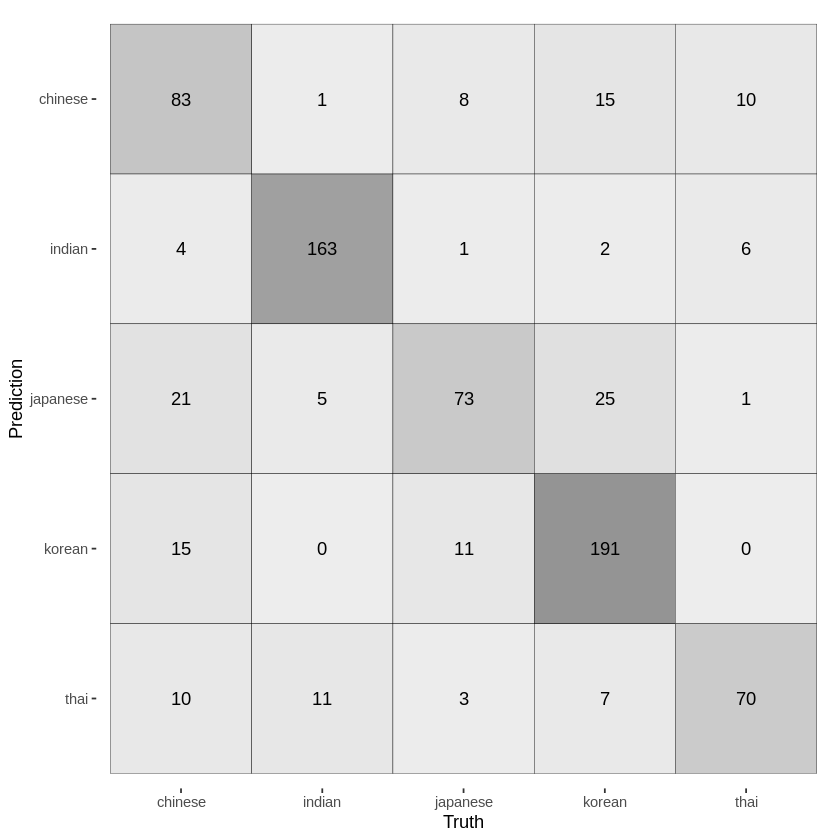

In [11]:
update_geom_defaults(geom = "tile", new = list(color = "black", alpha = 0.7))
# Visualize confusion matrix
results %>% 
  conf_mat(cuisine, .pred_class) %>% 
  autoplot(type = "heatmap")

สี่เหลี่ยมที่มีสีเข้มในกราฟเมทริกซ์ความสับสนแสดงถึงจำนวนกรณีที่สูง และคุณน่าจะเห็นเส้นทแยงมุมของสี่เหลี่ยมสีเข้มที่บ่งบอกถึงกรณีที่ป้ายกำกับที่คาดการณ์และป้ายกำกับจริงตรงกัน

ตอนนี้เรามาคำนวณสถิติสรุปสำหรับเมทริกซ์ความสับสนกัน


In [12]:
# Summary stats for confusion matrix
conf_mat(data = results, truth = cuisine, estimate = .pred_class) %>% 
summary()

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.7880435
kap,multiclass,0.7276583
sens,macro,0.7780927
spec,macro,0.9477598
ppv,macro,0.7585583
npv,macro,0.9460080
mcc,multiclass,0.7292724
j_index,macro,0.7258524
bal_accuracy,macro,0.8629262


ถ้าเรามุ่งเน้นไปที่ตัวชี้วัดบางอย่าง เช่น ความแม่นยำ, ความไว, ppv เราก็ไม่ได้เริ่มต้นแย่เลย 🥳!

## 4. เจาะลึกลงไปอีก

ลองถามคำถามที่ละเอียดอ่อนสักข้อ: เกณฑ์อะไรที่ใช้ในการตัดสินใจเลือกประเภทของอาหารเป็นผลลัพธ์ที่คาดการณ์?

จริง ๆ แล้ว อัลกอริทึมการเรียนรู้ของเครื่องเชิงสถิติ เช่น logistic regression จะอิงอยู่บน `ความน่าจะเป็น`; ดังนั้นสิ่งที่ตัวจำแนกประเภทคาดการณ์จริง ๆ ก็คือการแจกแจงความน่าจะเป็นในชุดของผลลัพธ์ที่เป็นไปได้ คลาสที่มีความน่าจะเป็นสูงสุดจะถูกเลือกเป็นผลลัพธ์ที่มีแนวโน้มมากที่สุดสำหรับการสังเกตที่กำหนด

ลองมาดูตัวอย่างนี้ในทางปฏิบัติโดยการทำทั้งการคาดการณ์แบบคลาสที่ชัดเจนและการคาดการณ์แบบความน่าจะเป็น


In [13]:
# Make hard class prediction and probabilities
results_prob <- cuisines_test %>%
  select(cuisine) %>% 
  bind_cols(mr_fit %>% predict(new_data = cuisines_test)) %>% 
  bind_cols(mr_fit %>% predict(new_data = cuisines_test, type = "prob"))

# Print out results
results_prob %>% 
  slice_head(n = 5)

cuisine,.pred_class,.pred_chinese,.pred_indian,.pred_japanese,.pred_korean,.pred_thai
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
indian,thai,1.551259e-03,0.4587877,5.988039e-04,2.428503e-04,5.388194e-01
indian,indian,2.637133e-05,0.9999488,6.648651e-07,2.259993e-05,1.577948e-06
indian,indian,1.049433e-03,0.9909982,1.060937e-03,1.644947e-05,6.874989e-03
indian,indian,6.237482e-02,0.4763035,9.136702e-02,3.660913e-01,3.863391e-03
indian,indian,1.431745e-02,0.9418551,2.945239e-02,8.721782e-03,5.653283e-03


✅ คุณสามารถอธิบายได้ไหมว่าทำไมโมเดลถึงมั่นใจว่าการสังเกตการณ์แรกเป็นภาษาไทย?

## **🚀ความท้าทาย**

ในบทเรียนนี้ คุณได้ใช้ข้อมูลที่ทำความสะอาดแล้วเพื่อสร้างโมเดลการเรียนรู้ของเครื่องที่สามารถทำนายอาหารประจำชาติได้จากชุดของส่วนผสม ลองใช้เวลาศึกษา [ตัวเลือกมากมาย](https://www.tidymodels.org/find/parsnip/#models) ที่ Tidymodels มีให้สำหรับการจัดประเภทข้อมูล และ [วิธีอื่นๆ](https://parsnip.tidymodels.org/articles/articles/Examples.html#multinom_reg-models) ในการปรับโมเดลการถดถอยแบบหลายตัวแปร

#### ขอบคุณ:

[`Allison Horst`](https://twitter.com/allison_horst/) สำหรับการสร้างภาพประกอบที่น่าทึ่งซึ่งทำให้ R ดูน่าสนใจและเข้าถึงได้มากขึ้น ค้นหาภาพประกอบเพิ่มเติมได้ที่ [แกลเลอรี](https://www.google.com/url?q=https://github.com/allisonhorst/stats-illustrations&sa=D&source=editors&ust=1626380772530000&usg=AOvVaw3zcfyCizFQZpkSLzxiiQEM) ของเธอ

[Cassie Breviu](https://www.twitter.com/cassieview) และ [Jen Looper](https://www.twitter.com/jenlooper) สำหรับการสร้างเวอร์ชัน Python ดั้งเดิมของโมดูลนี้ ♥️

<br>
อยากจะใส่มุกตลกลงไป แต่ฉันไม่เข้าใจมุกเกี่ยวกับอาหารเลย 😅

<br>

เรียนรู้อย่างมีความสุข,

[Eric](https://twitter.com/ericntay), Gold Microsoft Learn Student Ambassador



---

**ข้อจำกัดความรับผิดชอบ**:  
เอกสารนี้ได้รับการแปลโดยใช้บริการแปลภาษา AI [Co-op Translator](https://github.com/Azure/co-op-translator) แม้ว่าเราจะพยายามให้การแปลมีความถูกต้อง แต่โปรดทราบว่าการแปลอัตโนมัติอาจมีข้อผิดพลาดหรือความไม่แม่นยำ เอกสารต้นฉบับในภาษาต้นทางควรถือเป็นแหล่งข้อมูลที่เชื่อถือได้ สำหรับข้อมูลที่สำคัญ ขอแนะนำให้ใช้บริการแปลภาษามนุษย์มืออาชีพ เราจะไม่รับผิดชอบต่อความเข้าใจผิดหรือการตีความที่ผิดพลาดซึ่งเกิดจากการใช้การแปลนี้
